In [1]:
# Add the src directory to the Python path
import sys
sys.path.append('../src')
# Import necessary modules
from data_connection import fetch_xdr_data
from cleaned_data import clean_data
from User_Engagement_analysis import aggregate_engagement_metrics,normalize_engagement_metrics, kmeans_clustering_engagement, report_top_customers,compute_cluster_metrics, top_users_per_application
from visualization import visualize_cluster_metrics
from data_formatter import format_table


In [2]:

# Fetch data from PostgreSQL
xdr_data = fetch_xdr_data()


In [3]:
# Aggregate data per user
engagement_data = aggregate_engagement_metrics(xdr_data)

In [4]:
report_top_customers(engagement_data)



Top 10 customers by Session Duration:
       MSISDN/Number  session_duration
13180   3.362578e+10        18553754.0
6437    3.361489e+10         9966898.0
92923   3.376054e+10         9279434.0
13526   3.362632e+10         8791927.0
65118   3.366716e+10         8744914.0
50281   3.366284e+10         6614270.0
57160   3.366469e+10         6288730.0
666     3.360313e+10         6287761.0
66029   3.366746e+10         5649882.0
92577   3.376041e+10         5321667.0

Top 10 customers by Session Duration:
       MSISDN/Number  session_duration
13180   3.362578e+10        18553754.0
6437    3.361489e+10         9966898.0
92923   3.376054e+10         9279434.0
13526   3.362632e+10         8791927.0
65118   3.366716e+10         8744914.0
50281   3.366284e+10         6614270.0
57160   3.366469e+10         6288730.0
666     3.360313e+10         6287761.0
66029   3.366746e+10         5649882.0
92577   3.376041e+10         5321667.0

Top 10 customers by Total Traffic:
       MSISDN/Number  total_

{'session_duration':        MSISDN/Number  session_duration
 13180   3.362578e+10        18553754.0
 6437    3.361489e+10         9966898.0
 92923   3.376054e+10         9279434.0
 13526   3.362632e+10         8791927.0
 65118   3.366716e+10         8744914.0
 50281   3.366284e+10         6614270.0
 57160   3.366469e+10         6288730.0
 666     3.360313e+10         6287761.0
 66029   3.366746e+10         5649882.0
 92577   3.376041e+10         5321667.0,
 'total_traffic':        MSISDN/Number  total_traffic
 6437    3.361489e+10   8.846226e+09
 92923   3.376054e+10   8.514774e+09
 13180   3.362578e+10   8.499621e+09
 13526   3.362632e+10   7.971167e+09
 76363   3.367588e+10   7.891111e+09
 37052   3.365973e+10   7.705863e+09
 63028   3.366646e+10   7.308501e+09
 92577   3.376041e+10   7.132371e+09
 57241   3.366471e+10   6.872018e+09
 86455   3.369879e+10   6.540899e+09}

In [5]:

# Normalize engagement metrics
normalized_data = normalize_engagement_metrics(engagement_data)

In [6]:
# Normalize engagement metrics
normalized_data = normalize_engagement_metrics(engagement_data)

# Run K-Means clustering
clustered_data, kmeans_model = kmeans_clustering_engagement(normalized_data, k=3)

# Display clustered data
print(clustered_data.head())

# Display cluster centers
print("Cluster Centers:")
print(kmeans_model.cluster_centers_)


   MSISDN/Number  sessions_frequency  session_duration  total_traffic  \
0   3.360100e+10           -0.481290         -0.158014       0.382297   
1   3.360100e+10           -0.481290          0.188148      -1.087666   
2   3.360100e+10           -0.481290         -0.060090      -0.193453   
3   3.360101e+10           -0.481290         -0.516690      -0.547071   
4   3.360101e+10            0.753493         -0.585235       1.560825   

   engagement_cluster  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1  
Cluster Centers:
[[-0.45383997 -0.23131114 -0.39899094]
 [ 0.97535836  0.36842032  0.86009134]
 [ 3.71119731  2.73218662  3.24562755]]


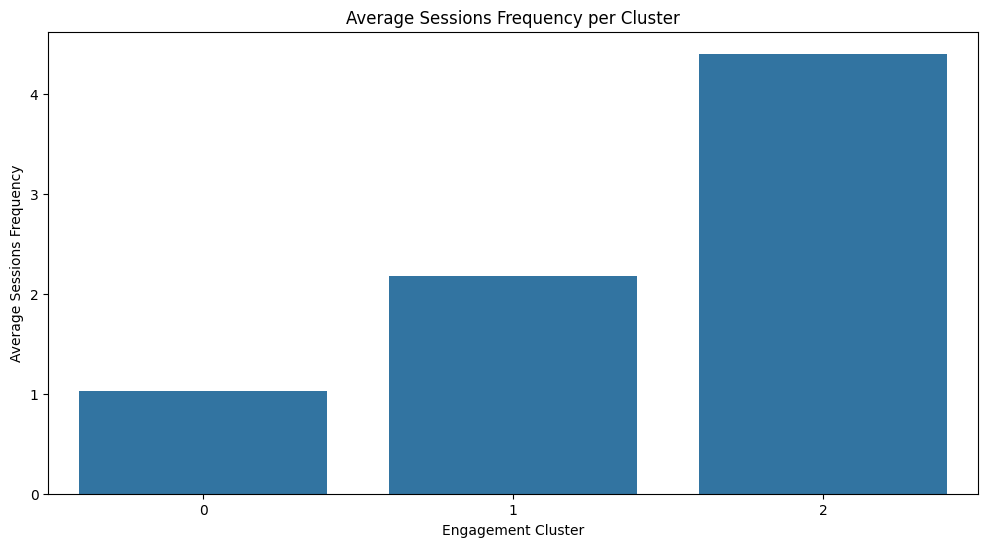

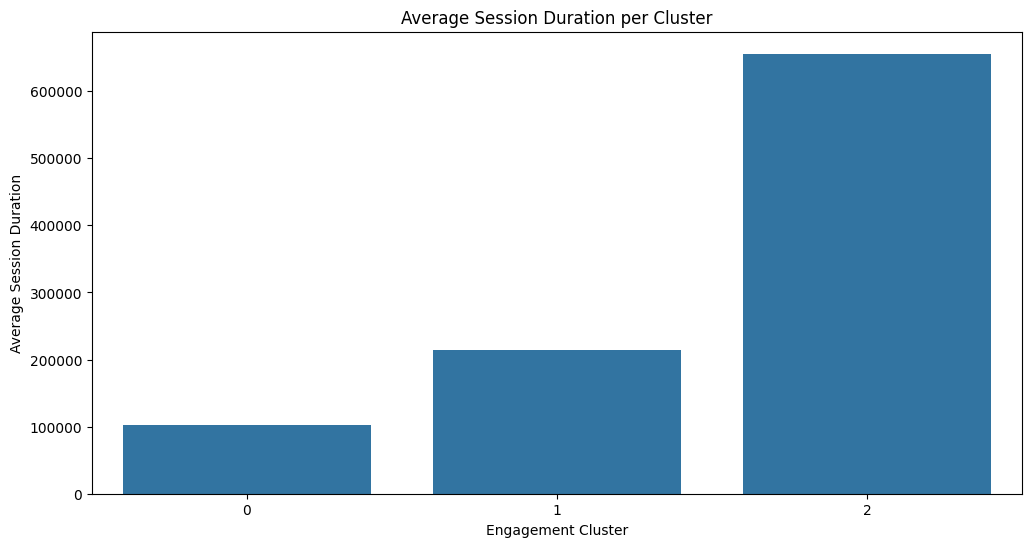

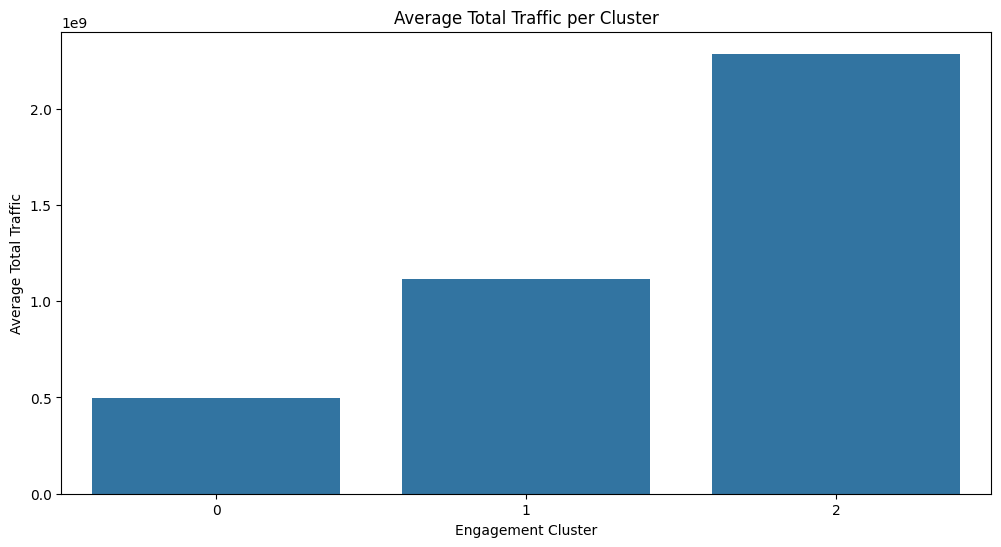

In [7]:
# Compute cluster metrics
cluster_summary = compute_cluster_metrics(clustered_data, engagement_data)
format_table(cluster_summary)

# Visualize metrics
visualize_cluster_metrics(cluster_summary)


Cluster 0 (Low Engagement ): These users show minimal activity, with low session frequency, short session durations, and limited data usage. They represent potential churn risks or casual users.

Cluster 1 (Moderate Engagement ): Customers in this group have moderate session frequency, average session durations, and balanced data usage. They likely represent stable, regular users.

Cluster 2 (High Engagement ): This cluster includes highly active users with frequent sessions, long session durations, and heavy data consumption. They are valuable customers, often power users or on premium plans.

Recommendation: Focus on retaining Cluster 2, upselling to Cluster 1, and re-engaging Cluster 0 with targeted incentives.

In [11]:
top_users = top_users_per_application(xdr_data)
for app, df in top_users.items():
    print(f"\n🔹 **Top 10 Most Engaged Users for {app}** 🔹\n")
    print(df.rename(columns={f'{app}_Total': 'Total Traffic (Bytes)'}).to_string(index=False))
    print("\n" + "-"*50)


🔹 **Top 10 Most Engaged Users for Social Media** 🔹

 MSISDN/Number  Total Traffic (Bytes)
  3.362632e+10             43374779.0
  3.376054e+10             39783189.0
  3.365973e+10             35412358.0
  3.361489e+10             28294544.0
  3.362578e+10             27135500.0
  3.366716e+10             24247850.0
  3.378632e+10             23974919.0
  3.366907e+10             23800834.0
  3.360313e+10             23077825.0
  3.365849e+10             23000066.0

--------------------------------------------------

🔹 **Top 10 Most Engaged Users for Google** 🔹

 MSISDN/Number  Total Traffic (Bytes)
  3.362632e+10            152191852.0
  3.362578e+10            142307915.0
  3.361489e+10            127973787.0
  3.376054e+10            123223099.0
  3.365973e+10            116516345.0
  3.378632e+10            110254484.0
  3.367588e+10            109860502.0
  3.366716e+10            105032696.0
  3.376127e+10             97089988.0
  3.369876e+10             91935151.0

-----------